# Financial Transaction Dataset - Exploratory Data Analysis

## Data Loading and Initial Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
fraud_df = pd.read_csv('data/financial_fraud_detection_dataset.csv')
fraud_df.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [3]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [4]:
fraud_df.isnull().sum()

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64

**Dataset Overview**

The dataset contains 5 million credit card transactions with 18 features including transaction details, merchant information, device usage, and engineered risk scores. The data spans from 2023 and includes both categorical and numerical features designed for fraud detection analysis.

**Missing Data Analysis**

- **fraud_type**: 4,820,447 missing values (96.4%) - only populated for fraudulent transactions

- **time_since_last_transaction**: 896,513 missing values (17.9%) - significant missing data that could impact analysis

All other features are complete with no missing values

In [5]:
# drop columns that are not needed for analysis
fraud_df.drop(columns=['fraud_type', 'time_since_last_transaction'], inplace=True, errors='ignore')

In [6]:
fraud_df.describe()

,amount,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,5.020000e+00,2.000000e+01,1.000000e+00



**Statistical Summary Insights**

- **Amount**: Mean transaction of $358.93 with high variability (std=$469.93). Maximum transaction is $3,521, indicating right-skewed distribution

- **Spending Deviation Score**: Standardized feature with mean near 0 and std of 1, ranging from -5.26 to 5.02

- **Velocity Score**: Discrete values from 1-20 with mean of 10.5, suggesting uniform distribution

- **Geo Anomaly Score**: Uniform distribution from 0-1 with mean of 0.5, indicating random geographic anomaly assignment

<br/>
<br/>

## Data Distribution Analysis

In [7]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect, palette='Set2').set(title=f'Distribution of {column}')

def correlation_plot(data: pd.DataFrame = None):
    numeric_df = data.select_dtypes(include=['float64', 'int64'])
    corr = numeric_df.corr()
    return corr.style.background_gradient(cmap='coolwarm')

<br/>

### Continuous Variable Distributions

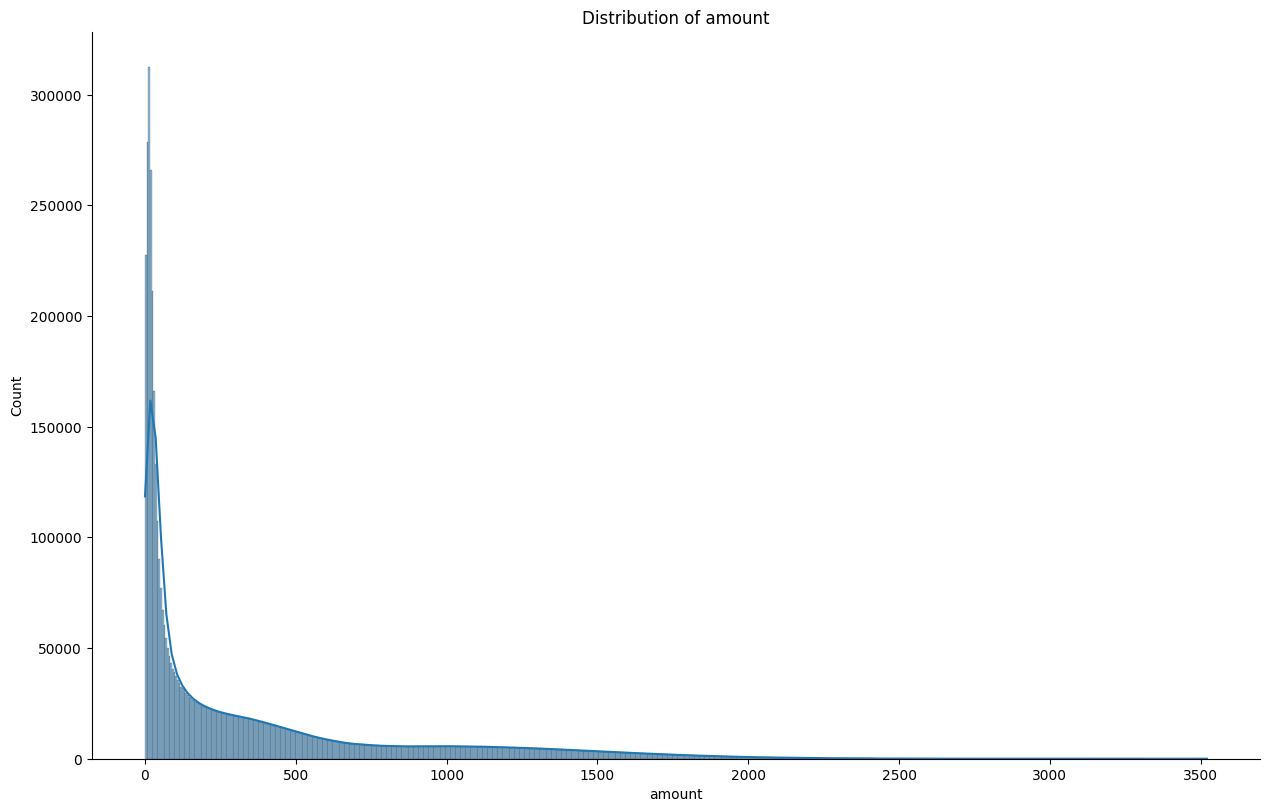

In [8]:
plot_continuous_distribution(fraud_df, 'amount')

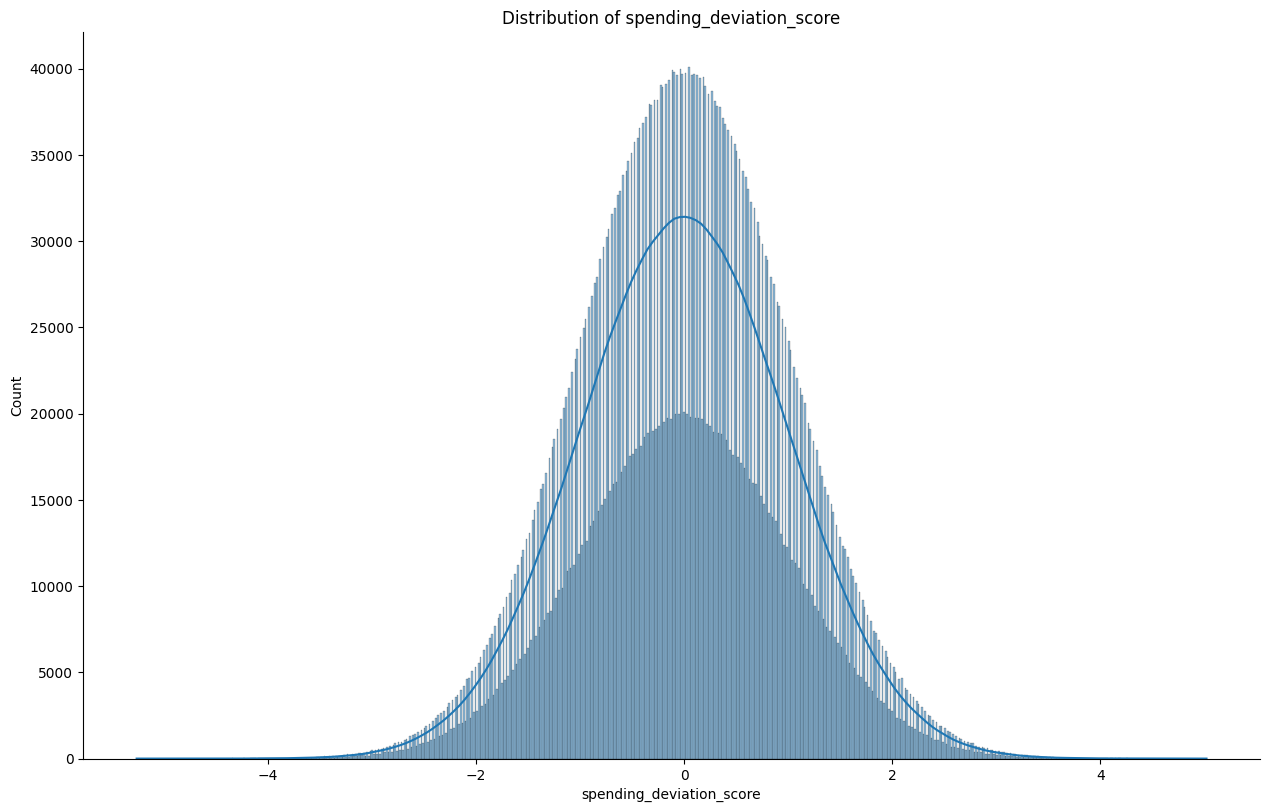

In [9]:
plot_continuous_distribution(fraud_df, 'spending_deviation_score')

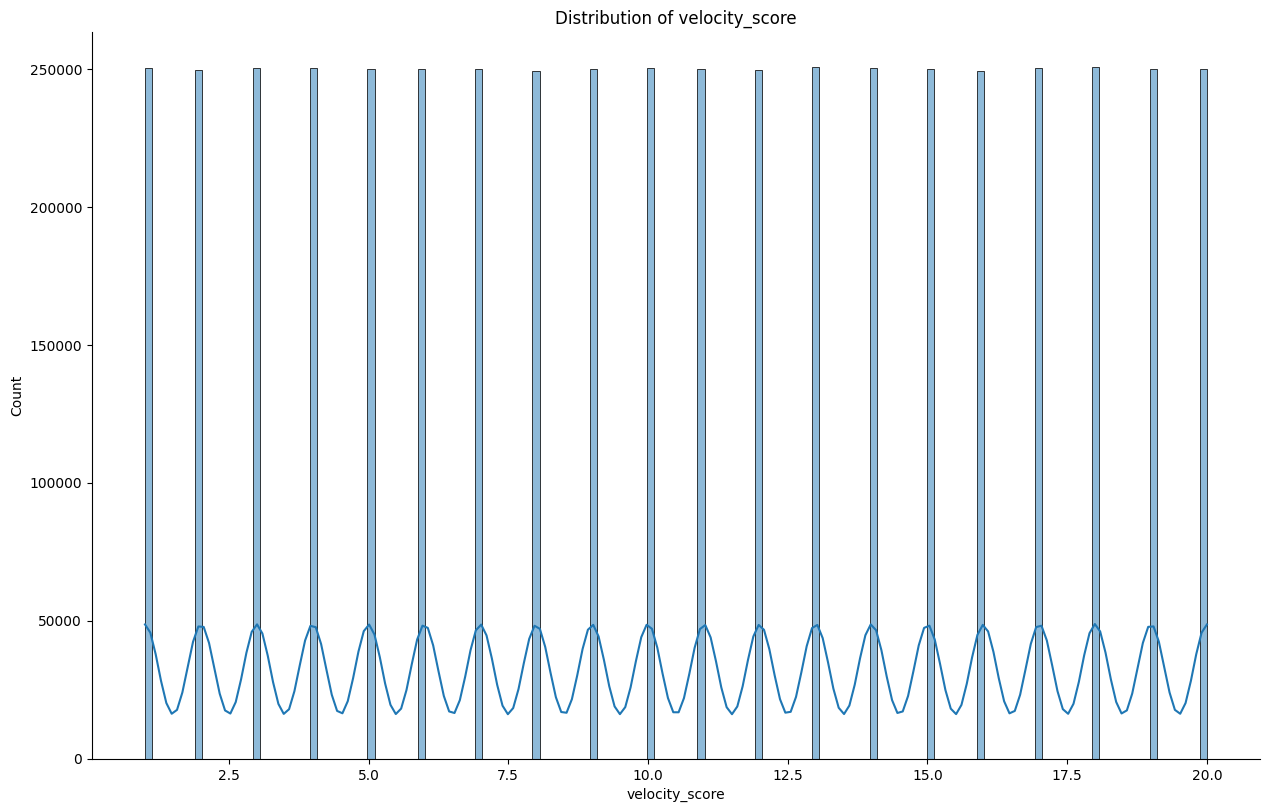

In [10]:
plot_continuous_distribution(fraud_df, 'velocity_score')

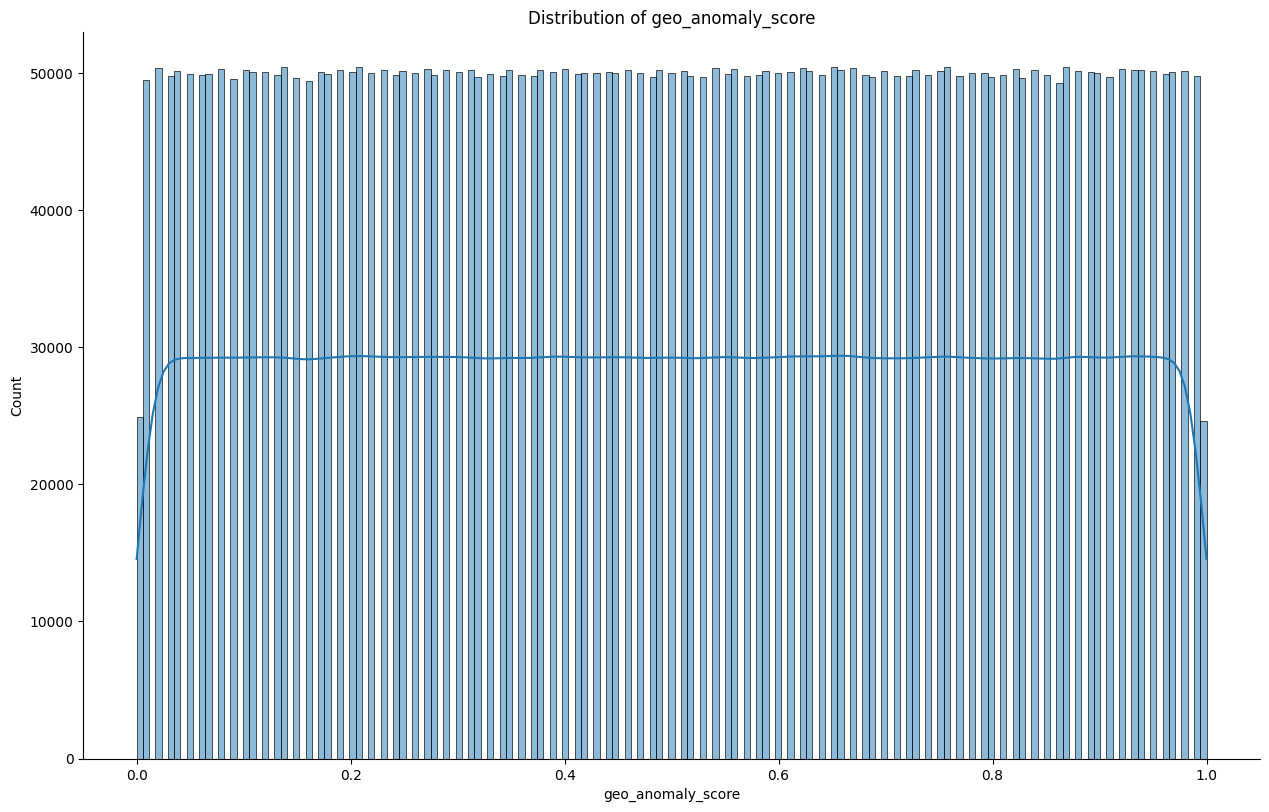

In [11]:
plot_continuous_distribution(fraud_df, 'geo_anomaly_score')

**Continuous Variables Observations**

1. **Amount Distribution**: Highly right-skewed with most transactions under $500, showing typical financial transaction patterns 

2. **Spending Deviation Score**: Perfect normal distribution centered at 0, indicating proper standardization

3. **Velocity Score**: Uniform discrete distribution across values 1-20, suggesting artificial generation

4. **Geographic Anomaly Score**: Uniform continuous distribution from 0-1, indicating random assignment rather than realistic geographic patterns

<br/>

### Categorical Variable Analysis

In [12]:
# Timestamp Analysis
get_unique_values(fraud_df, 'timestamp')

Column: timestamp has 4999998 unique values

2023-12-14T01:56:37.401698    2
2023-08-26T11:17:05.440776    2
2023-08-22T09:22:43.516168    1
2023-10-27T17:20:24.164980    1
2023-01-18T14:25:31.881226    1
                             ..
2023-01-06T01:46:34.727721    1
2023-07-20T17:53:37.023294    1
2023-02-07T04:47:32.791040    1
2023-11-04T20:44:58.933486    1
2023-09-02T04:34:34.583803    1
Name: timestamp, Length: 4999998, dtype: int64


Nearly 5 million unique timestamps with only 2 duplicate timestamps, indicating realistic temporal distribution across the dataset timeframe.

In [13]:
get_unique_values(fraud_df, 'transaction_type')

Column: transaction_type has 4 unique values

deposit       1250593
payment       1250438
transfer      1250334
withdrawal    1248635
Name: transaction_type, dtype: int64


Four transaction types with balanced distribution: deposits (1.25M), payments (1.25M), transfers (1.25M), and withdrawals (1.25M). The near-perfect balance suggests synthetic data generation.

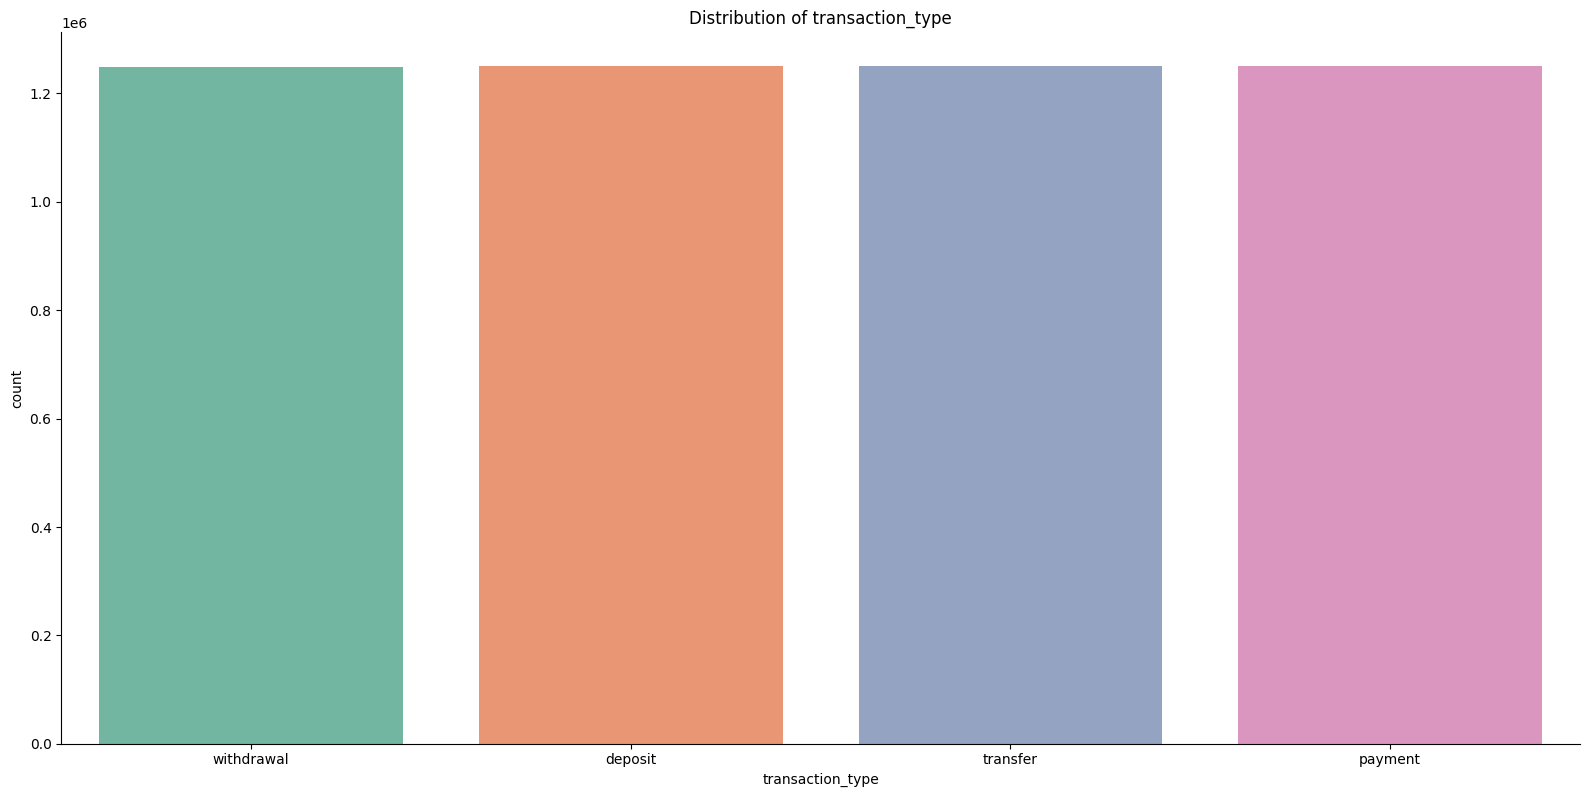

In [14]:
plot_categorical_distribution(fraud_df, 'transaction_type')

In [15]:
# Merchant Category Distribution
get_unique_values(fraud_df, 'merchant_category')

Column: merchant_category has 8 unique values

retail           626319
travel           625656
restaurant       625483
entertainment    625332
grocery          624954
other            624589
utilities        624086
online           623581
Name: merchant_category, dtype: int64


Eight categories with remarkably balanced distribution (624K-626K each): retail, travel, restaurant, entertainment, grocery, other, utilities, and online. The uniform distribution confirms synthetic data characteristics.

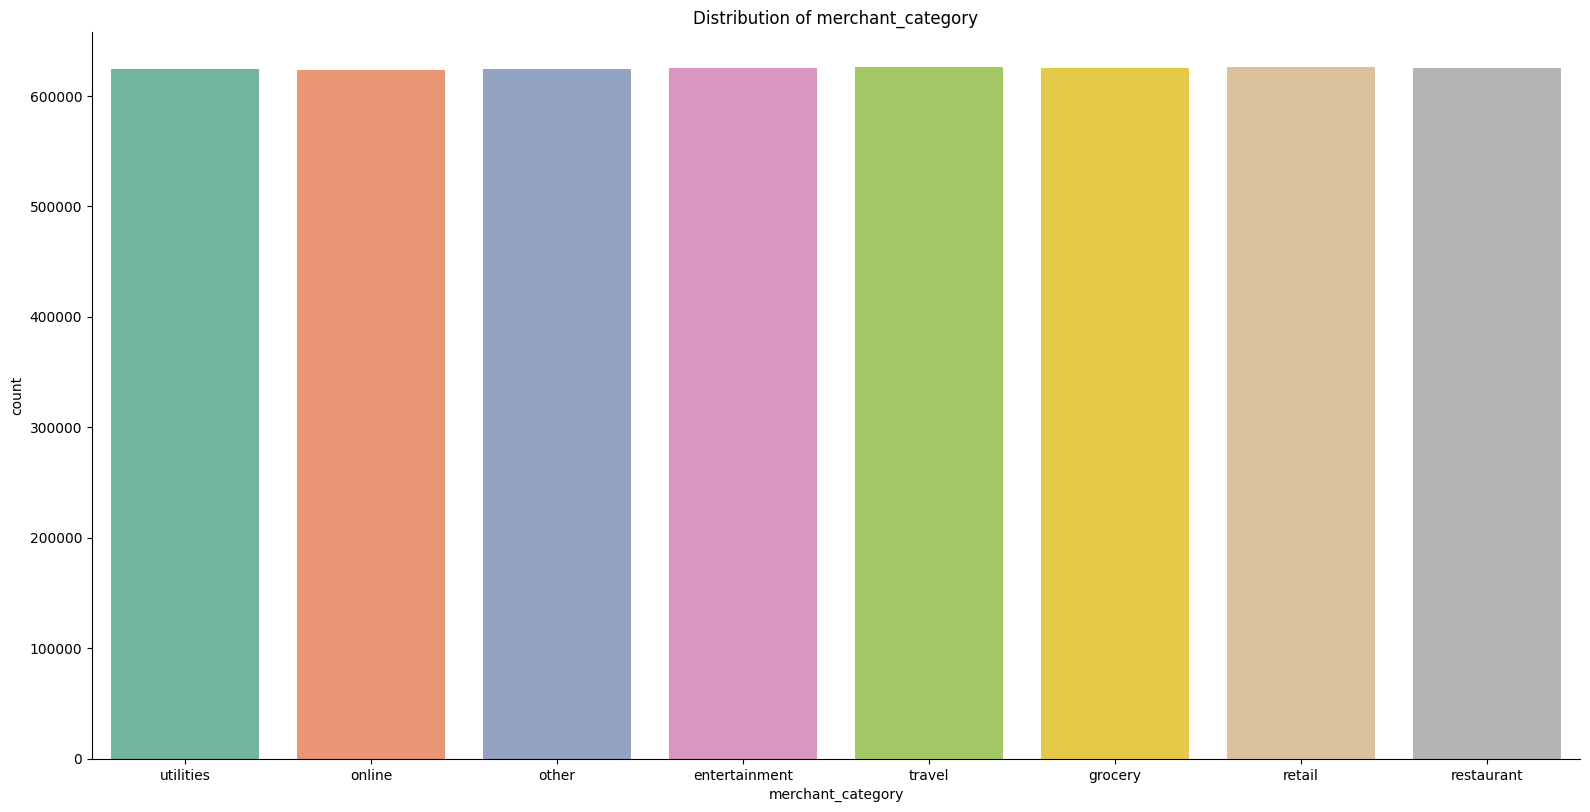

In [16]:
plot_categorical_distribution(fraud_df, 'merchant_category')

In [17]:
# Geographic Distribution
get_unique_values(fraud_df, 'location')

Column: location has 8 unique values

Tokyo        625994
New York     625354
Singapore    625313
Berlin       625289
Sydney       625125
Toronto      624349
Dubai        624320
London       624256
Name: location, dtype: int64


Eight global locations with balanced representation (624K-626K each): Tokyo, New York, Singapore, Berlin, Sydney, Toronto, Dubai, and London. The equal distribution across diverse geographic regions is unrealistic for natural transaction data.

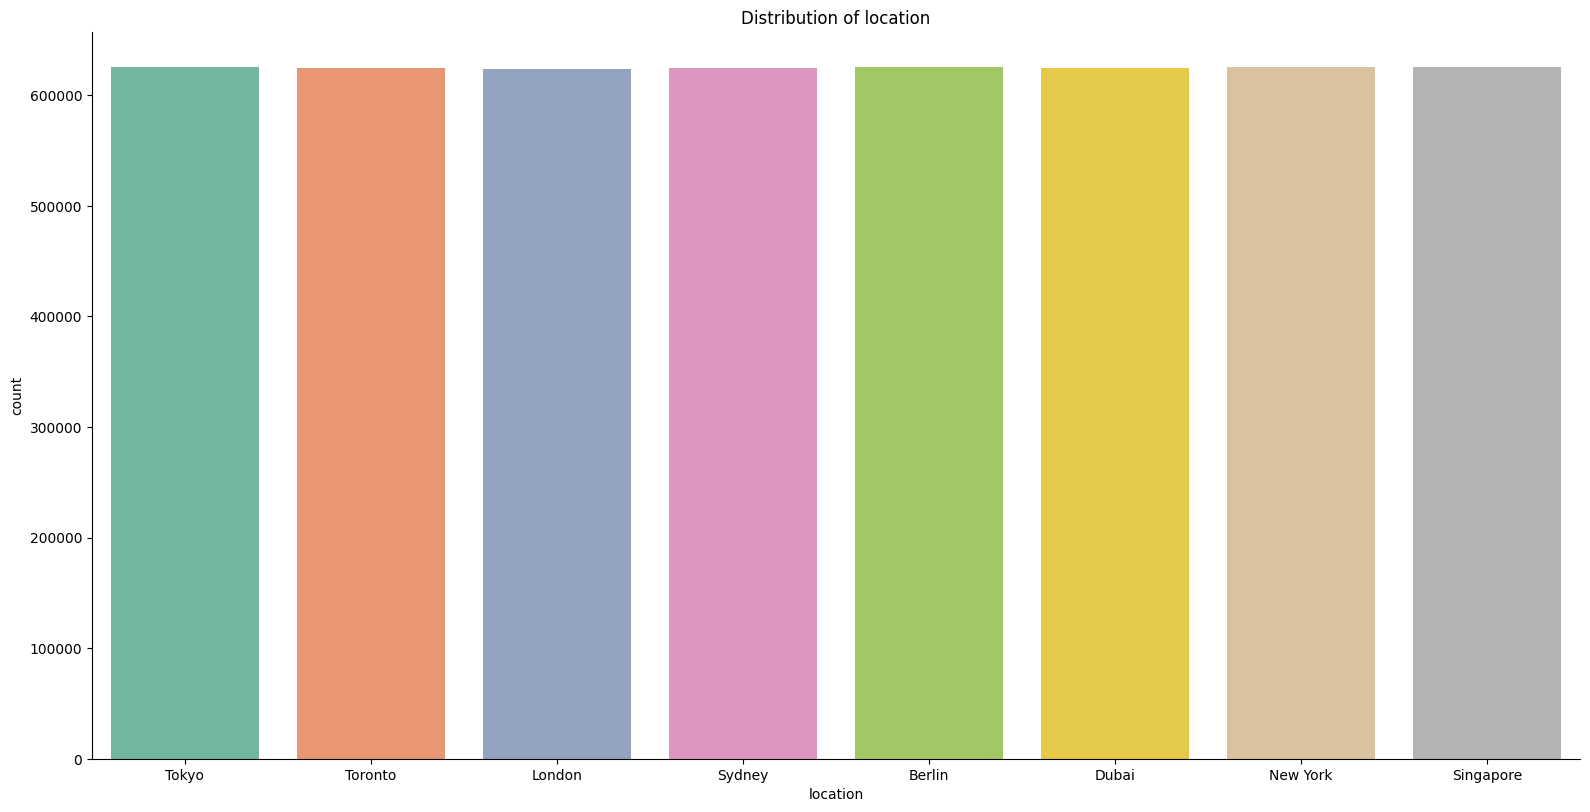

In [18]:
plot_categorical_distribution(fraud_df, 'location')

In [19]:
# Device Usage Distribution
get_unique_values(fraud_df, 'device_used')

Column: device_used has 4 unique values

mobile    1251131
web       1250071
atm       1249640
pos       1249158
Name: device_used, dtype: int64


Four device types with balanced usage: mobile (1.25M), web (1.25M), ATM (1.25M), and POS (1.25M). The equal distribution across device types indicates synthetic generation rather than realistic user behavior patterns.

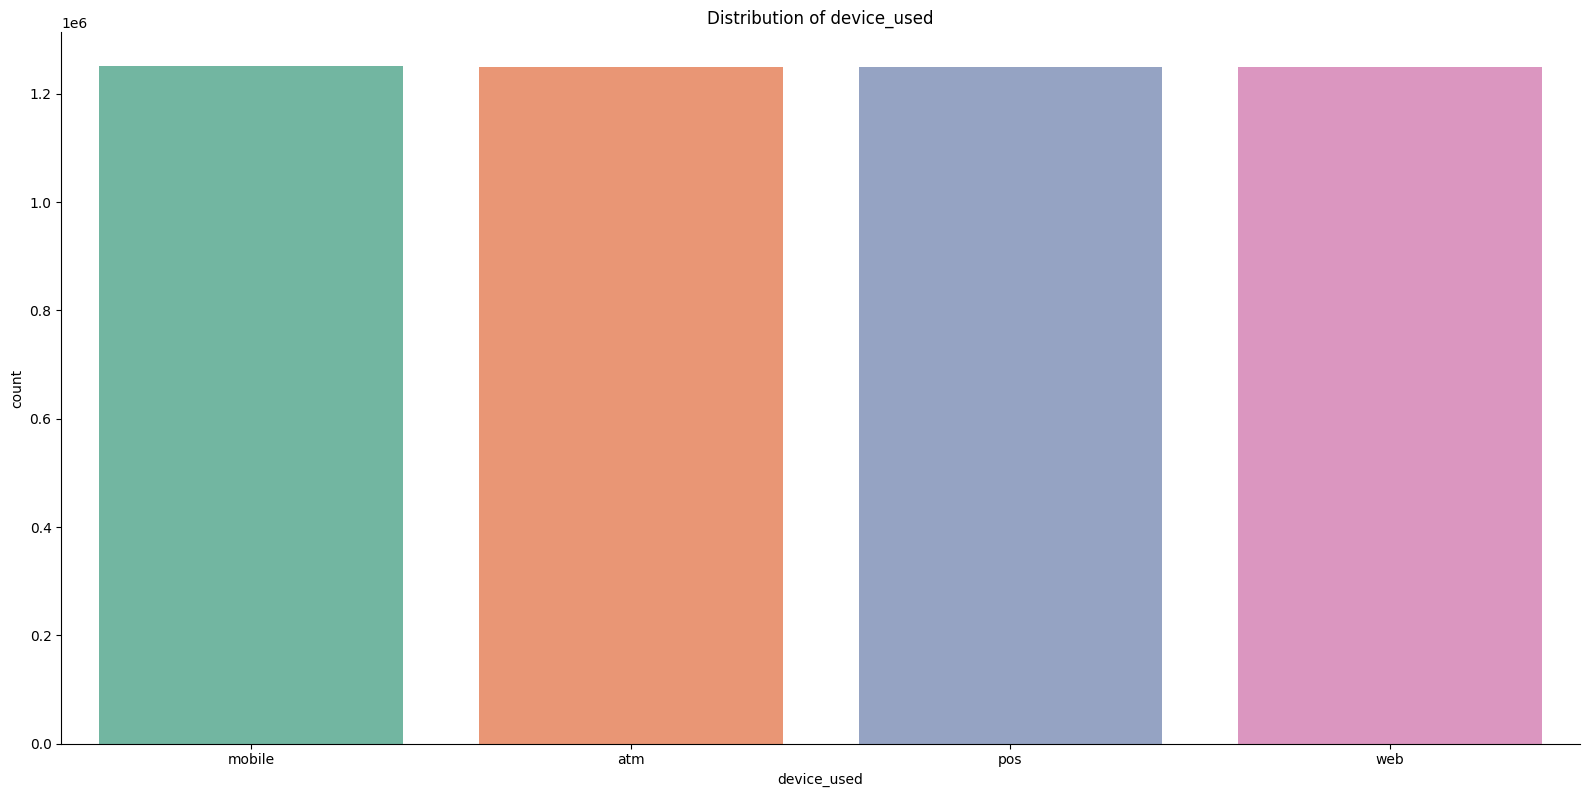

In [20]:
plot_categorical_distribution(fraud_df, 'device_used')

In [21]:
# Payment Channel Distribution
get_unique_values(fraud_df, 'payment_channel')

Column: payment_channel has 4 unique values

wire_transfer    1251219
ACH              1250241
card             1249693
UPI              1248847
Name: payment_channel, dtype: int64


Four payment channels with balanced distribution: wire transfer (1.25M), ACH (1.25M), card (1.25M), and UPI (1.25M). The uniform distribution is unrealistic as card payments typically dominate real-world transactions.

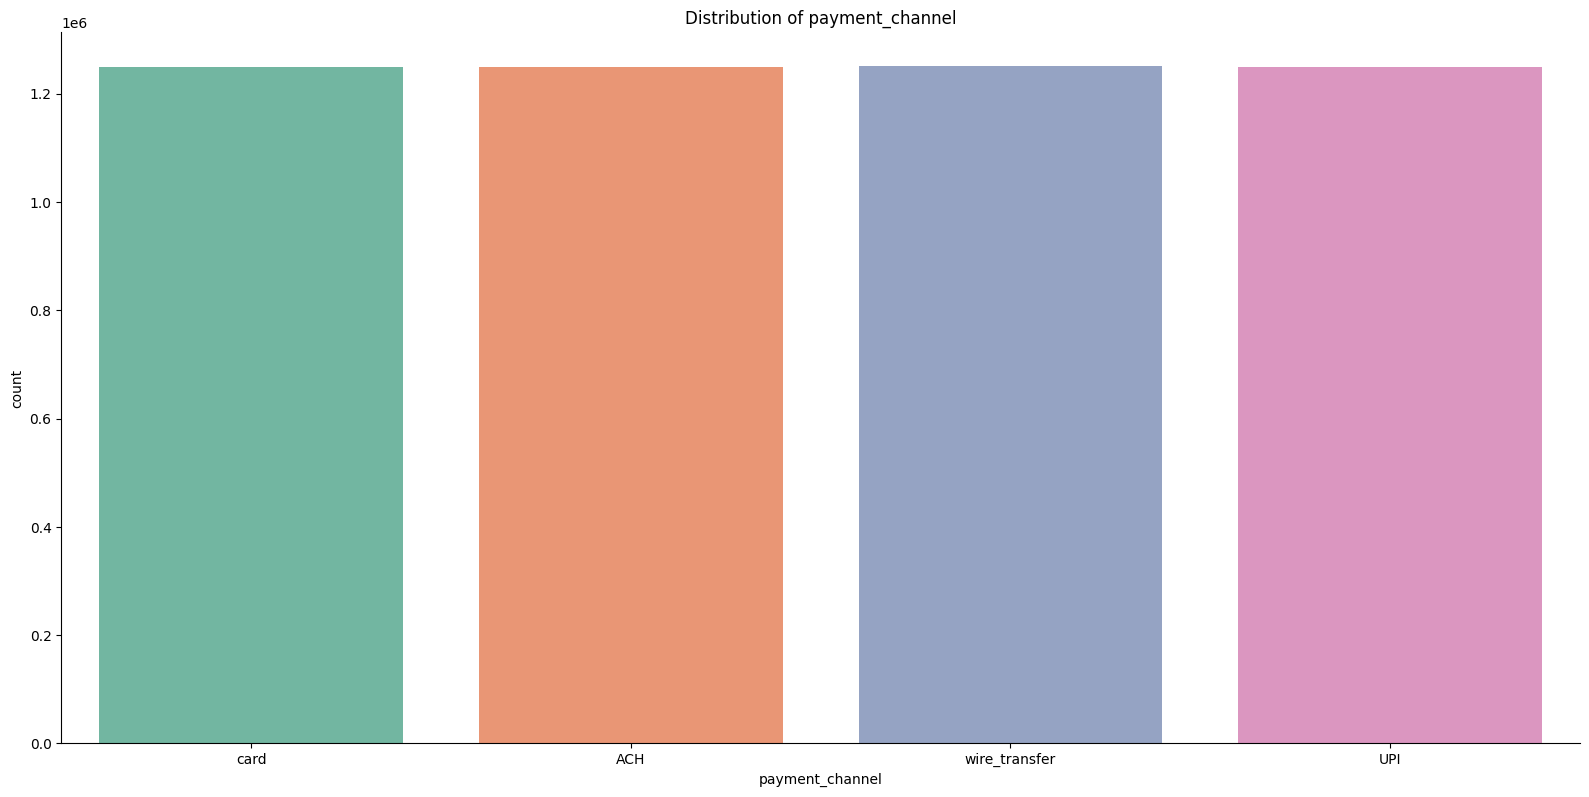

In [22]:
plot_categorical_distribution(fraud_df, 'payment_channel')

In [23]:
#Class Distribution
get_unique_values(fraud_df, 'is_fraud')

Column: is_fraud has 2 unique values

False    4820447
True      179553
Name: is_fraud, dtype: int64


- Legitimate transactions: 4,820,447 (96.4%)
- Fraudulent transactions: 179,553 (3.6%)

This represents a significant class imbalance typical of fraud detection datasets, requiring careful handling in model development.

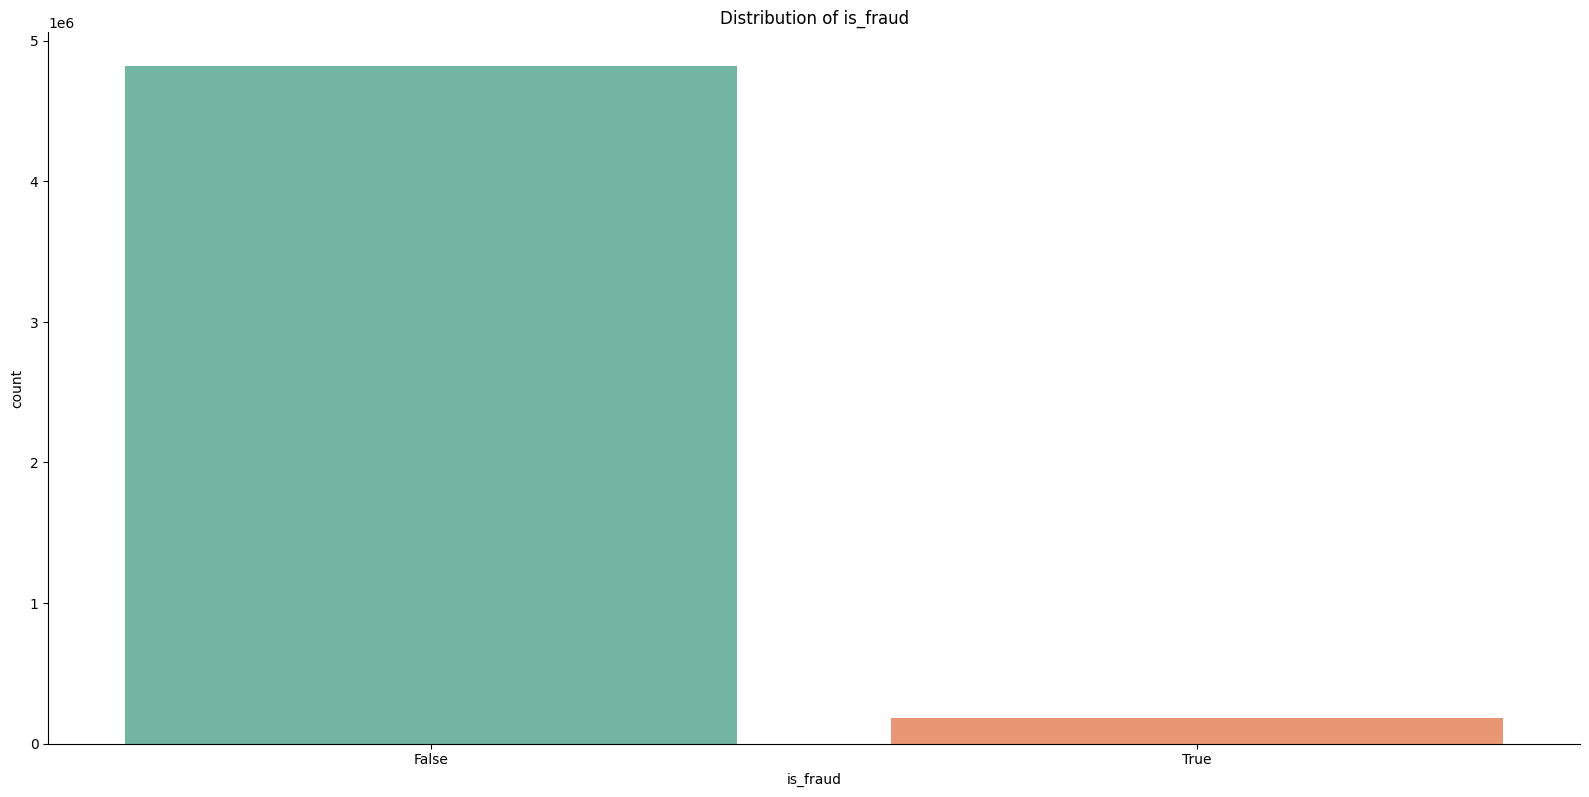

In [24]:
plot_categorical_distribution(fraud_df, 'is_fraud')

### Observations: Data Quality & Distribution

1. **Massive class imbalance**: Only 3.6% fraud cases (179,553 fraud vs 4,820,447 legitimate)

2. **Amount distribution**: Highly right-skewed, most transactions under $500, max $3,521
3. **Spending deviation score**: Normal distribution centered around 0 (standardized feature)
4. **Velocity score**: Uniform distribution across discrete values 1-20
5. **Geographic anomaly score**: Uniform distribution 0-1
6. **Categorical variables**: All show relatively balanced distributions across categories

<br/>

## Fraud-Specific Analysis

### Fraud Rates by Categorical Variables

In [25]:
# Fraud rates by categorical variables
fraud_rates = {}
categorical_cols = ['transaction_type', 'merchant_category', 'location', 'device_used', 'payment_channel']

for col in categorical_cols:
    fraud_rates[col] = fraud_df.groupby(col)['is_fraud'].agg(['count', 'sum', 'mean']).round(4)
    fraud_rates[col]['fraud_rate'] = fraud_rates[col]['mean']
    print(f"\nFraud rates by {col}:")
    print(fraud_rates[col].sort_values('fraud_rate', ascending=False))


Fraud rates by transaction_type:
                    count    sum    mean  fraud_rate
transaction_type                                    
transfer          1250334  45328  0.0363      0.0363
withdrawal        1248635  44874  0.0359      0.0359
deposit           1250593  44786  0.0358      0.0358
payment           1250438  44565  0.0356      0.0356

Fraud rates by merchant_category:
                    count    sum    mean  fraud_rate
merchant_category                                   
entertainment      625332  22573  0.0361      0.0361
other              624589  22556  0.0361      0.0361
grocery            624954  22516  0.0360      0.0360
travel             625656  22503  0.0360      0.0360
online             623581  22324  0.0358      0.0358
restaurant         625483  22367  0.0358      0.0358
retail             626319  22453  0.0358      0.0358
utilities          624086  22261  0.0357      0.0357

Fraud rates by location:
            count    sum    mean  fraud_rate
location    

**Transaction Type:** Fraud rates are remarkably consistent across all transaction types (3.56-3.63%), with transfers having the highest fraud rate at 3.63% and payments the lowest at 3.56%. The difference is minimal, suggesting transaction type alone is not a strong fraud predictor.

**Merchant Category:** Entertainment and "other" categories show the highest fraud rates at 3.61%, while utilities has the lowest at 3.57%. Again, the variation is very small (0.4 percentage points), indicating merchant category has limited discriminative power for fraud detection.

**Location:** Toronto and London show slightly higher fraud rates (3.60%) compared to Tokyo and Dubai (3.58%). The geographic variation is minimal, suggesting fraud is evenly distributed across all locations in this synthetic dataset.

**Device Used:** ATM transactions have the highest fraud rate at 3.62%, while mobile transactions have the lowest at 3.57%. This 0.5 percentage point difference suggests device type may have slightly more predictive value than other categorical variables.

**Payment Channel:** Wire transfers show the highest fraud rate at 3.60%, with ACH having the lowest at 3.58%. The variation remains minimal across payment channels.


<br/>

### Fraud Analysis by Transaction Amount

In [26]:
# Fraud by amount ranges
fraud_df['amount_bin'] = pd.cut(fraud_df['amount'], bins=[0, 50, 200, 500, 1000, 5000], 
                               labels=['<$50', '$50-200', '$200-500', '$500-1000', '>$1000'])
amount_fraud = fraud_df.groupby('amount_bin')['is_fraud'].agg(['count', 'sum', 'mean'])
print("Fraud rates by amount ranges:")
print(amount_fraud)

Fraud rates by amount ranges:
              count    sum      mean
amount_bin                          
<$50        1789916  64384  0.035970
$50-200      994884  35727  0.035911
$200-500     956660  34412  0.035971
$500-1000    632746  22456  0.035490
>$1000       625794  22574  0.036073


Transactions over $1,000 have the highest fraud rate at 3.61%, while transactions between $500-1,000 have the lowest at 3.55%. Surprisingly, the smallest transactions (<$50) have a high fraud rate of 3.60%, suggesting both very small and very large transactions may be slightly riskier. However, the overall variation is less than 0.6 percentage points.

<br/>

### Risk Score Analysis


spending_deviation_score - Fraud vs Legitimate:
              count      mean       std   min   25%  50%   75%   max
is_fraud                                                            
False     4820447.0 -0.000427  1.000748 -5.26 -0.68  0.0  0.67  5.02
True       179553.0  0.000652  1.002394 -4.40 -0.68  0.0  0.68  4.90


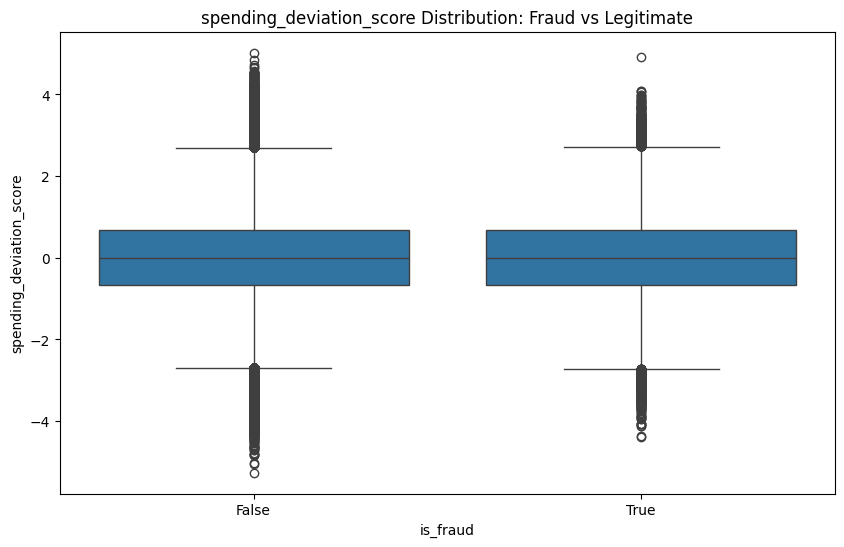


velocity_score - Fraud vs Legitimate:
              count       mean       std  min  25%   50%   75%   max
is_fraud                                                            
False     4820447.0  10.500908  5.766826  1.0  5.0  11.0  16.0  20.0
True       179553.0  10.512378  5.767278  1.0  6.0  11.0  16.0  20.0


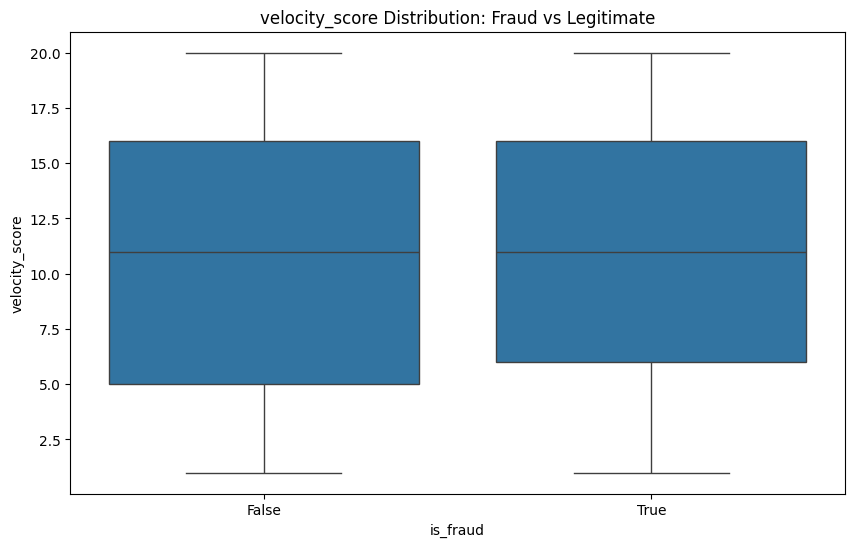


geo_anomaly_score - Fraud vs Legitimate:
              count      mean       std  min   25%  50%   75%  max
is_fraud                                                          
False     4820447.0  0.500012  0.288639  0.0  0.25  0.5  0.75  1.0
True       179553.0  0.500494  0.288517  0.0  0.25  0.5  0.75  1.0


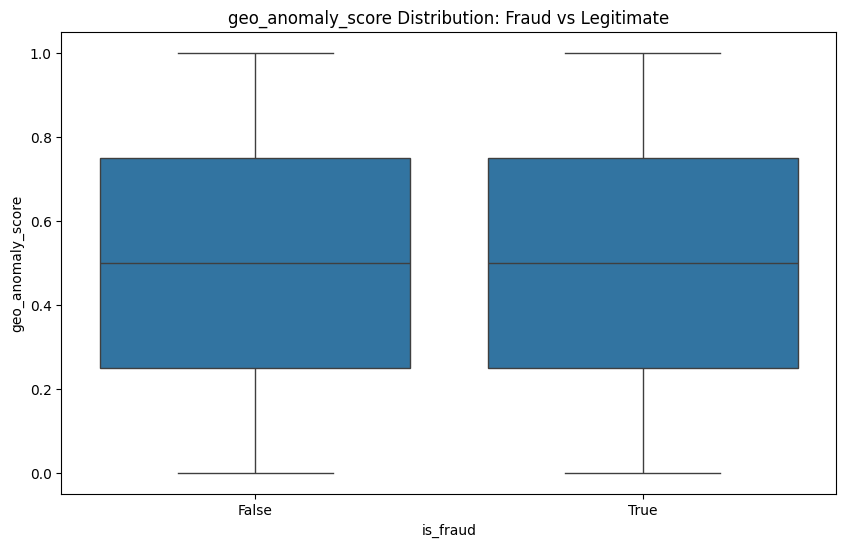

In [27]:
# Analyze the engineered risk features
risk_features = ['spending_deviation_score', 'velocity_score', 'geo_anomaly_score']

for feature in risk_features:
    print(f"\n{feature} - Fraud vs Legitimate:")
    print(fraud_df.groupby('is_fraud')[feature].describe())
    
    # Box plots comparing fraud vs legitimate
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=fraud_df, x='is_fraud', y=feature)
    plt.title(f'{feature} Distribution: Fraud vs Legitimate')
    plt.show()

**Spending Deviation Score:** The box plots show virtually identical distributions between fraud and legitimate transactions. Both groups have the same median (0), quartiles, and range, indicating this engineered feature provides no discriminative power for fraud detection.

**Velocity Score:** Fraud and legitimate transactions show nearly identical velocity score distributions, with both having the same median (11) and interquartile ranges. This suggests transaction velocity is not effective for distinguishing fraudulent behavior.

**Geo Anomaly Score:** Both fraud and legitimate transactions display uniform distributions from 0 to 1 with identical medians (0.5) and quartiles. The geographic anomaly score appears to be randomly distributed and provides no fraud detection value.


<br/>

### Temporal Pattern Analysis

In [28]:
# Convert timestamp and analyze temporal patterns
fraud_df['timestamp'] = pd.to_datetime(fraud_df['timestamp'])
fraud_df['hour'] = fraud_df['timestamp'].dt.hour
fraud_df['day_of_week'] = fraud_df['timestamp'].dt.dayofweek
fraud_df['month'] = fraud_df['timestamp'].dt.month

# Fraud rates by time periods
time_fraud = fraud_df.groupby('hour')['is_fraud'].agg(['count', 'sum', 'mean'])
print("Fraud rates by hour of day:")
print(time_fraud.sort_values('mean', ascending=False))

Fraud rates by hour of day:
       count   sum      mean
hour                        
12    207949  7621  0.036648
8     208967  7627  0.036499
14    207753  7558  0.036380
0     208141  7572  0.036379
11    207640  7541  0.036318
4     208532  7559  0.036249
5     209498  7580  0.036182
7     208114  7515  0.036110
6     208093  7512  0.036099
22    208272  7511  0.036063
3     208256  7497  0.035999
17    208362  7490  0.035947
1     207952  7462  0.035883
10    209166  7496  0.035838
19    208431  7455  0.035767
21    208555  7458  0.035760
23    207687  7416  0.035708
13    208055  7425  0.035688
9     208983  7428  0.035544
15    208051  7384  0.035491
16    207897  7365  0.035426
18    208960  7401  0.035418
2     208680  7385  0.035389
20    208006  7295  0.035071


Fraud rates vary by hour from 3.51% (8 PM) to 3.66% (12 PM/noon). Peak fraud occurs during midday hours (12 PM, 8 AM, 2 PM), while evening hours (8-9 PM) show the lowest fraud rates. This 1.5 percentage point variation represents the largest discrimination seen across all features, suggesting temporal patterns may be the most useful for fraud detection.

<br/>

### Feature Combination Analysis

In [29]:
# High-risk combinations
high_risk_combos = fraud_df.groupby(['merchant_category', 'device_used'])['is_fraud'].agg(['count', 'sum', 'mean'])
high_risk_combos = high_risk_combos[high_risk_combos['count'] > 1000]  # Filter for statistical significance
print("High-risk merchant-device combinations:")
print(high_risk_combos.sort_values('mean', ascending=False).head(10))

High-risk merchant-device combinations:
                                count   sum      mean
merchant_category device_used                        
grocery           pos          155894  5752  0.036897
other             atm          156069  5723  0.036670
entertainment     atm          156355  5719  0.036577
travel            atm          156099  5701  0.036522
retail            web          156812  5717  0.036458
utilities         atm          155945  5672  0.036372
other             mobile       156571  5687  0.036322
restaurant        pos          156359  5674  0.036288
grocery           web          156857  5682  0.036224
travel            mobile       156499  5668  0.036217


The highest-risk combination is grocery purchases via POS devices (3.69% fraud rate), followed by "other" category ATM transactions (3.67%). Retail web transactions and various ATM combinations also show elevated fraud rates around 3.65%. These combinations show slightly more variation than individual features alone.

<br/>

### Statistical Correlation Analysis

In [30]:
# Calculate point-biserial correlation between features and fraud
from scipy.stats import pointbiserialr

correlations = {}
numeric_cols = ['amount', 'spending_deviation_score', 'velocity_score', 'geo_anomaly_score']

for col in numeric_cols:
    corr, p_value = pointbiserialr(fraud_df['is_fraud'], fraud_df[col])
    correlations[col] = {'correlation': corr, 'p_value': p_value}

print("Feature correlations with fraud:")
for feature, stats in correlations.items():
    print(f"{feature}: {stats['correlation']:.4f} (p={stats['p_value']:.2e})")

Feature correlations with fraud:
amount: -0.0002 (p=7.09e-01)
spending_deviation_score: 0.0002 (p=6.54e-01)
velocity_score: 0.0004 (p=4.08e-01)
geo_anomaly_score: 0.0003 (p=4.87e-01)


All engineered risk features show extremely weak correlations with fraud (0.0002-0.0004), which are not statistically significant. The amount correlation is essentially zero (-0.0002). This indicates that none of the continuous features in this synthetic dataset have meaningful predictive power for fraud detection, which is concerning for the realism of the synthetic data generation process.